\newpage

In [28]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
heart_disease = fetch_ucirepo(id=45) 
heart = heart_disease.data.original
df = pd.DataFrame(heart)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Q1

This is a binary classification problem where we predict whether a patient has a heart disease (1) or not (0) based on 13 clinical features such as age and gender.

# Q2

In [54]:
from sklearn.preprocessing import StandardScaler
numerical_cols = df.select_dtypes(include=[np.number]).columns
scale = StandardScaler()
df[numerical_cols] = scale.fit_transform(df[numerical_cols])

# Q3

In [32]:
df.shape

(303, 14)

In [35]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [29]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

In [48]:
df[numerical_cols].skew()

age        -0.209060
sex        -0.774935
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.189352
thal        0.244447
num         1.058496
dtype: float64

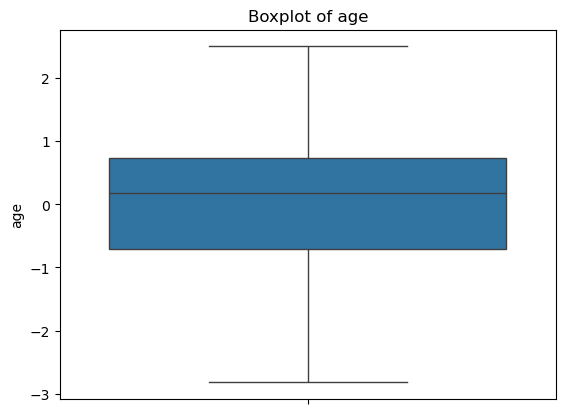

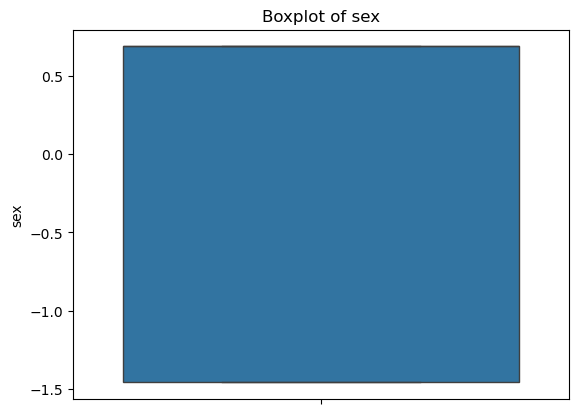

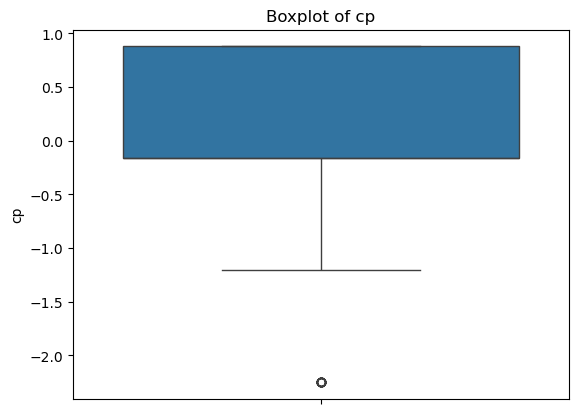

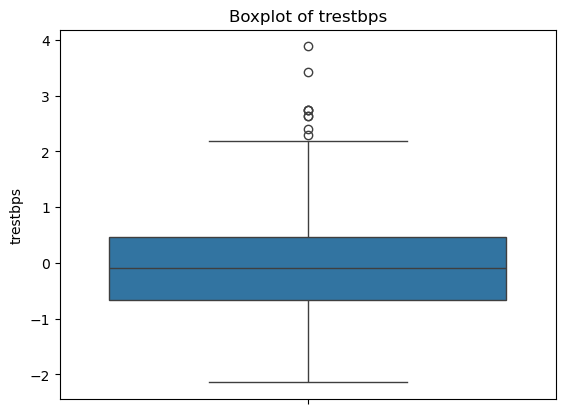

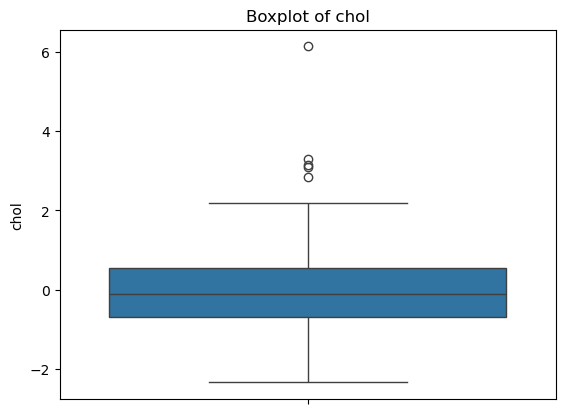

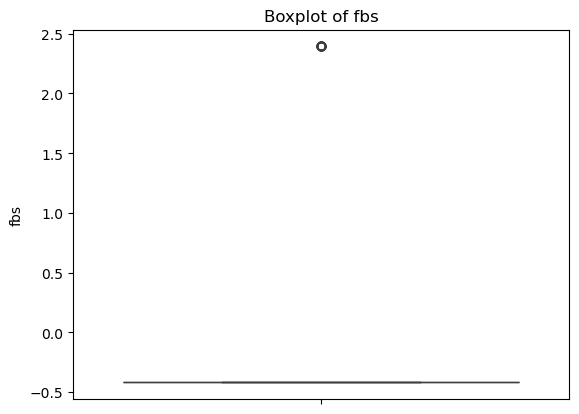

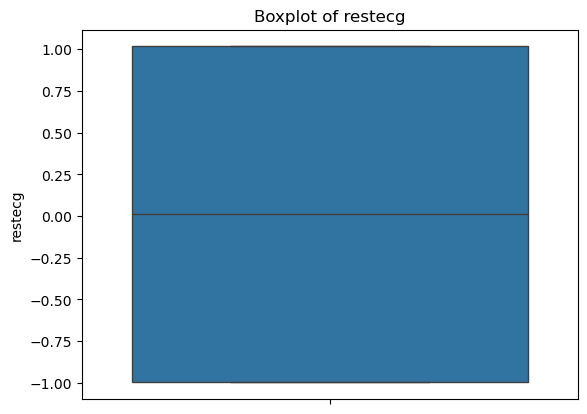

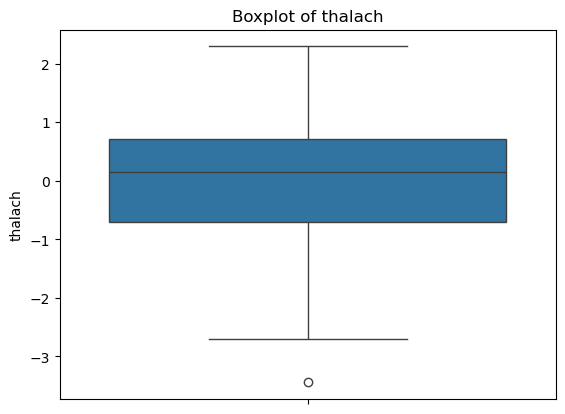

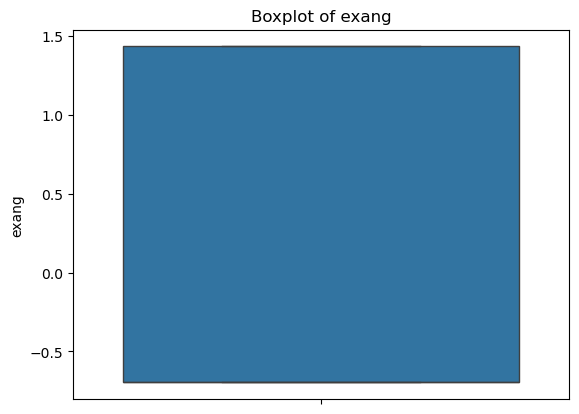

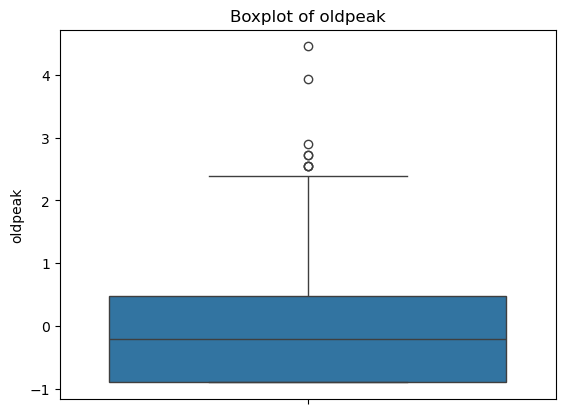

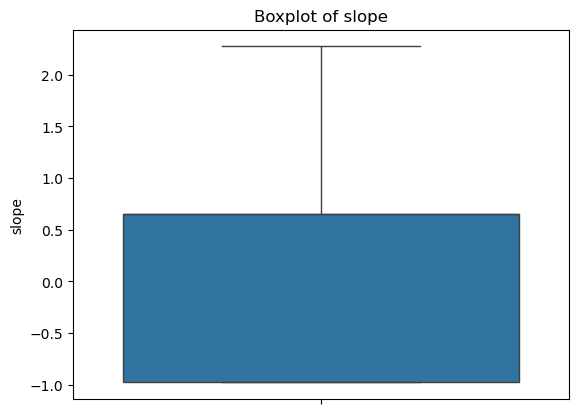

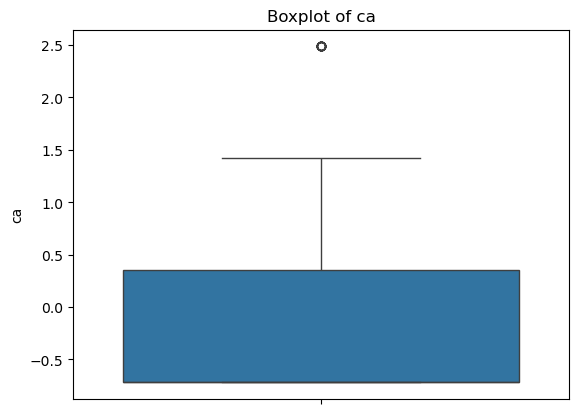

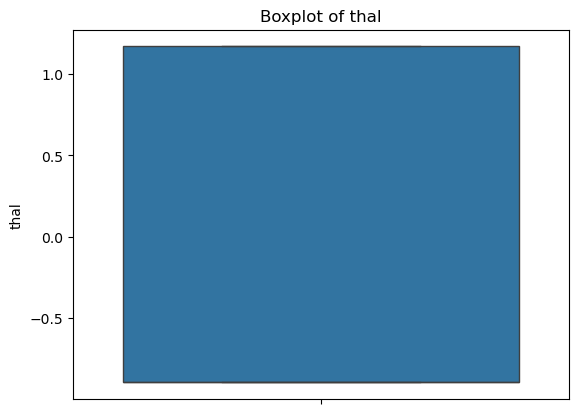

In [58]:
features = df.drop(columns='num')
for feature in features:
    plt.figure()
    sns.boxplot(data=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()



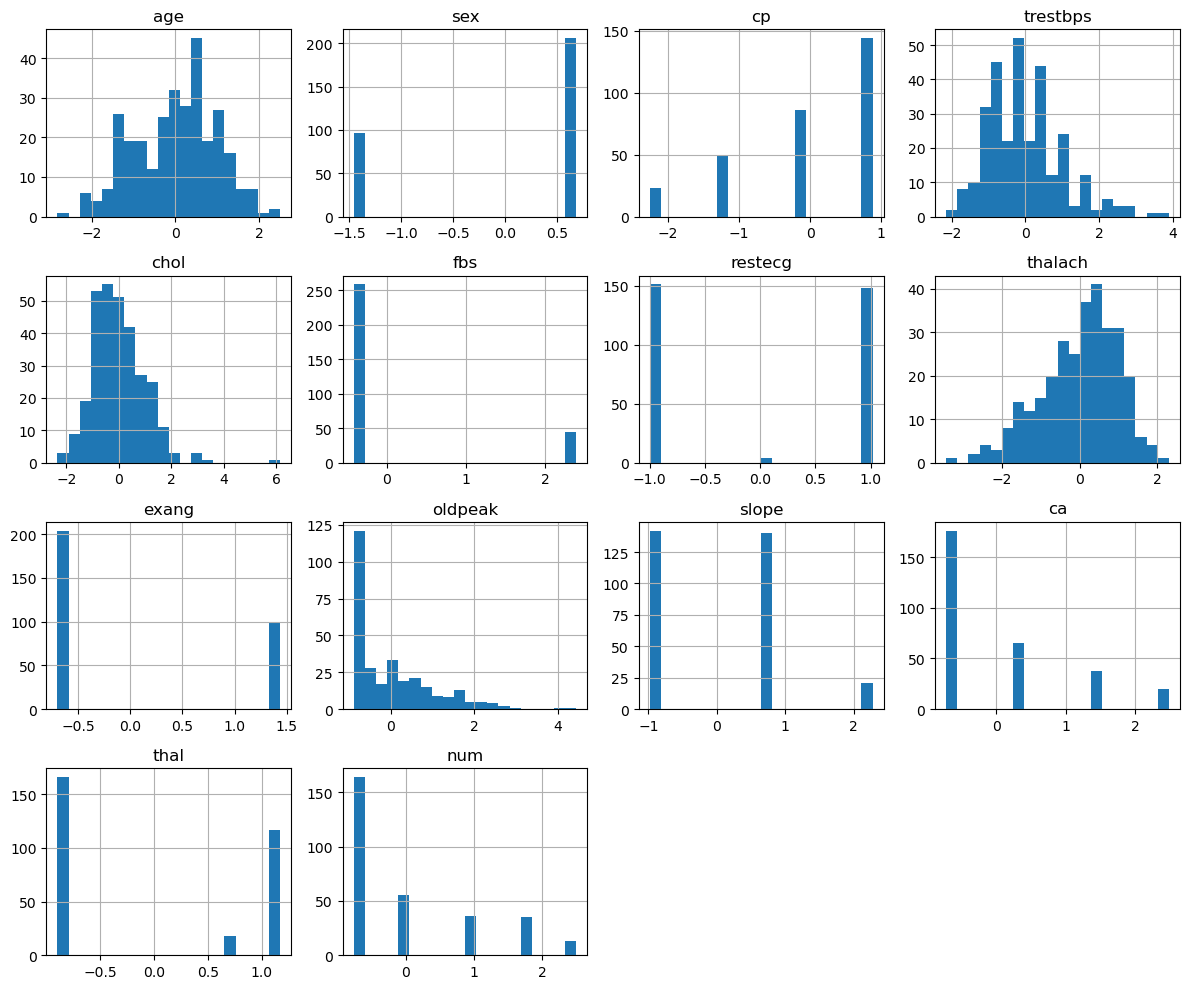

In [52]:
df[numerical_cols].hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

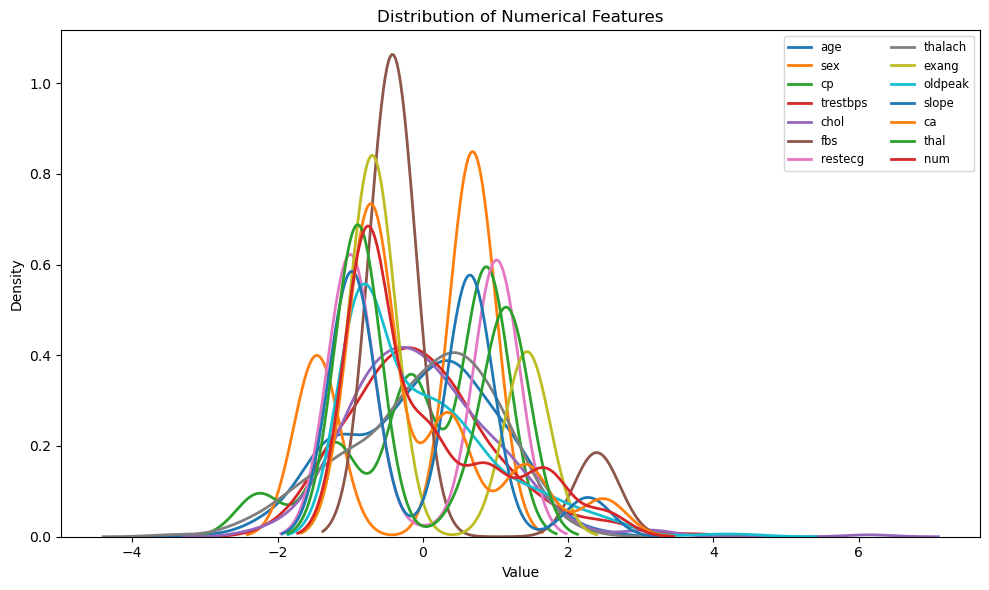

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for col in numerical_cols:
    sns.kdeplot(df[col], label=col, linewidth=2)
plt.title('Distribution of Numerical Features')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.tight_layout()
plt.show()

The dataset has 303 observations and 14 variables. All features are numeric (int64 or float64). chol, oldpeak are right-skewed while most other features are roughly symmetric.

# Q4

In [ ]:
df['num'] = np.where(df['num']>0,1,0)
df['num'].unique()

array([0, 1])

# Q5

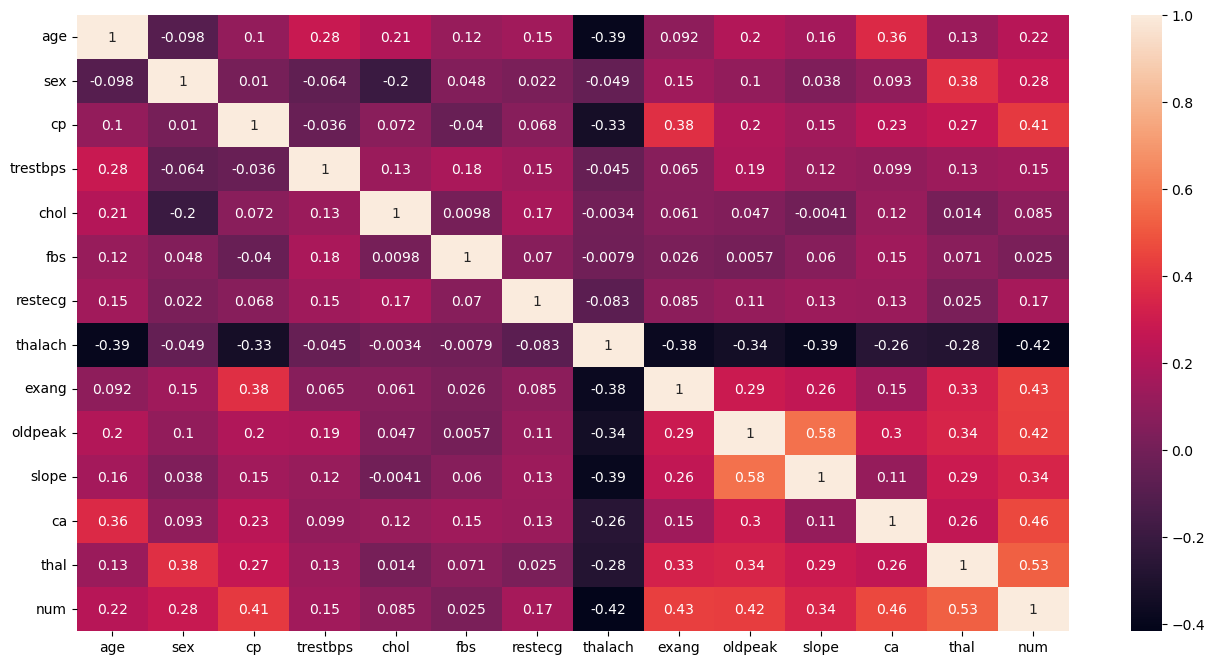

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

"thal" has the strongest positive correlation with num (0.53). The larger the Thalach, the higher the probability of developing heart disease, which can be considered as an important feature.

"thalach" is negatively correlated with num (-0.42), suggesting lower heart rate relates to disease presence.

"chol" and "restecg" have very weak correlation with num, and may be less informative.